## Начало лабораторной

Цены на кофе - https://www.kaggle.com/datasets/mayankanand2701/starbucks-stock-price-dataset

## Атрибуты

Date — Дата

Open — Открытие

High — Макс. цена

Low — Мин. цена

Close — Закрытие

Adj Close — Скорректированная цена закрытия

Volume — Объем торгов

Бизнес-цель: Улучшение финансового планирования

Использование подходов кластеризации для предсказания объемов продаж и доходов по различным сегментам

**Выгружаем данные**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("./static/csv/Starbucks Dataset.csv")
print(df.head())   

         Date      Open      High       Low     Close  Adj Close     Volume
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800


**Очистка данных**

In [4]:

df_cleaned = df.drop(columns=['Date'], errors='ignore').dropna()
print(df_cleaned.head())  # Вывод очищенного DataFrame


       Open      High       Low     Close  Adj Close     Volume
0  0.328125  0.347656  0.320313  0.335938   0.260703  224358400
1  0.339844  0.367188  0.332031  0.359375   0.278891   58732800
2  0.367188  0.371094  0.343750  0.347656   0.269797   34777600
3  0.351563  0.359375  0.339844  0.355469   0.275860   18316800
4  0.359375  0.359375  0.347656  0.355469   0.275860   13996800


In [5]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

print(df.isnull().sum())

print(df.isnull().any())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [6]:
# Проверка типов столбцов
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

**Визуализация парных взаимосвязей**

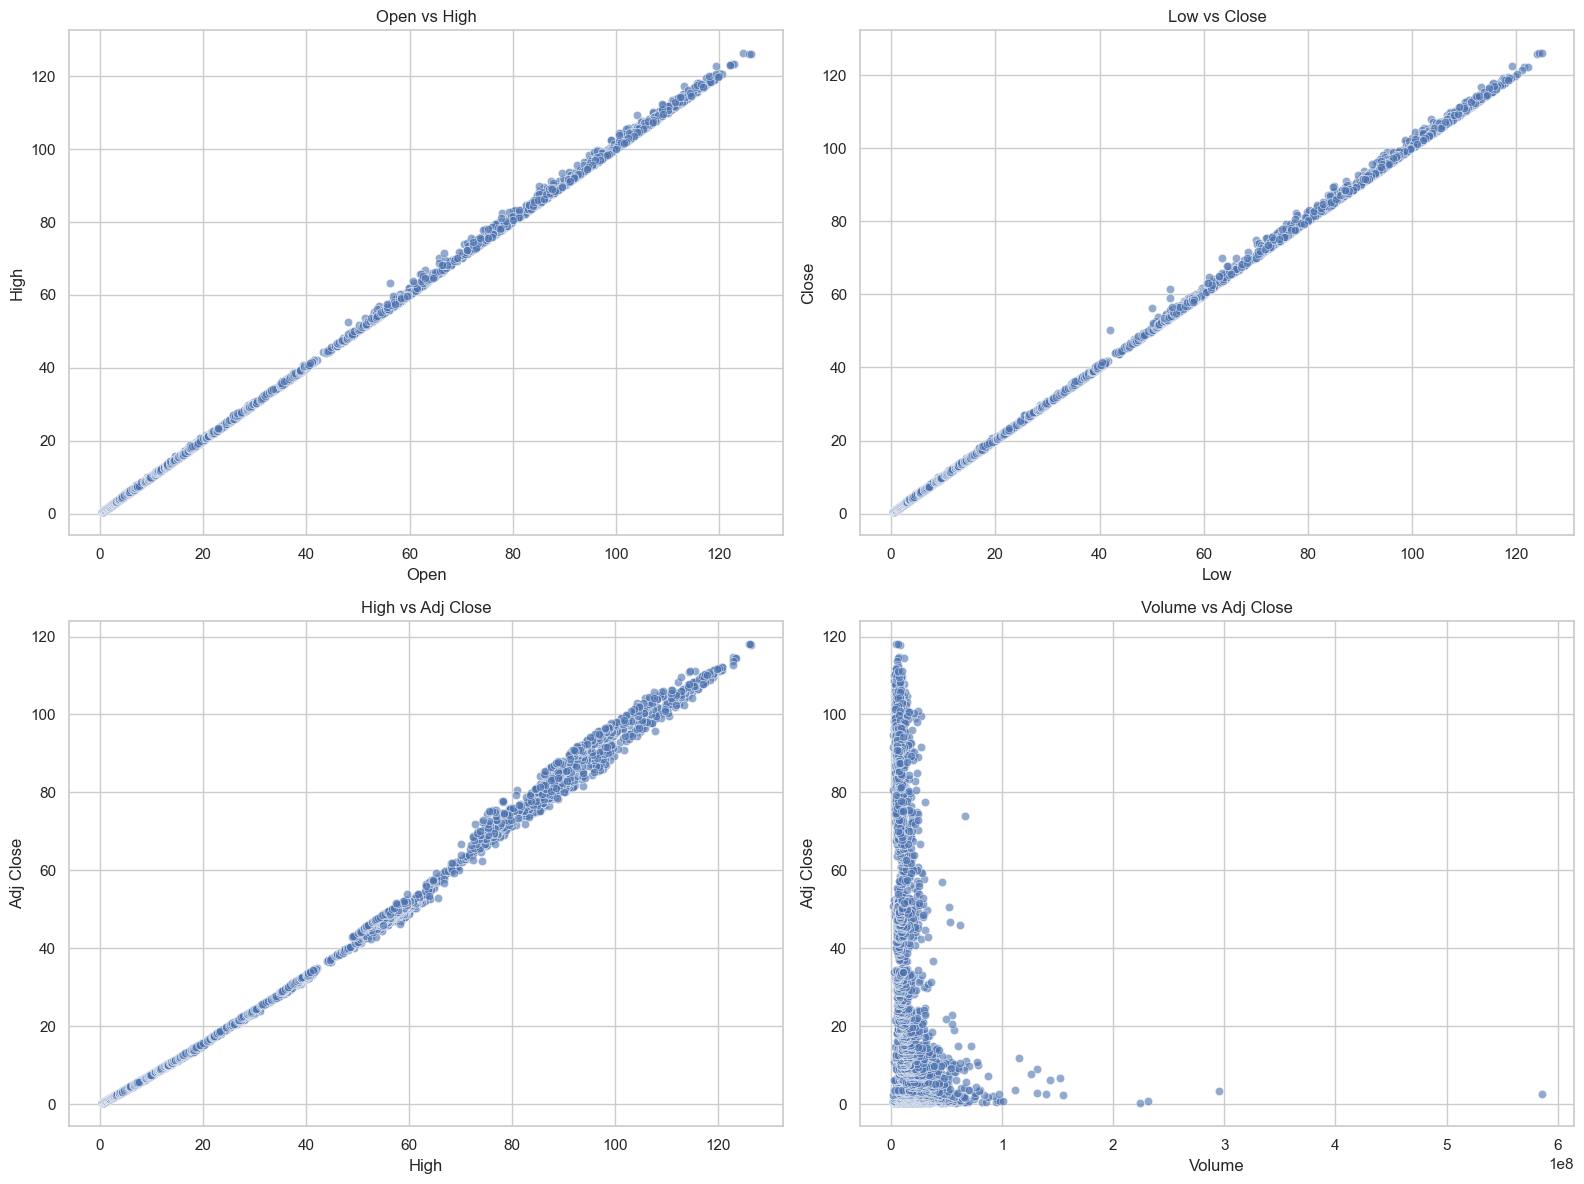

In [7]:

sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], alpha=0.6)
plt.title('Open vs High')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], alpha=0.6)
plt.title('Low vs Close')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], alpha=0.6)
plt.title('High vs Adj Close')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], alpha=0.6)
plt.title('Volume vs Adj Close')

plt.tight_layout()
plt.show()


**Стандартизация данных для кластеризации**

Стандартизация данных — процесс приведения всех признаков (столбцов) к одному масштабу.



In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)

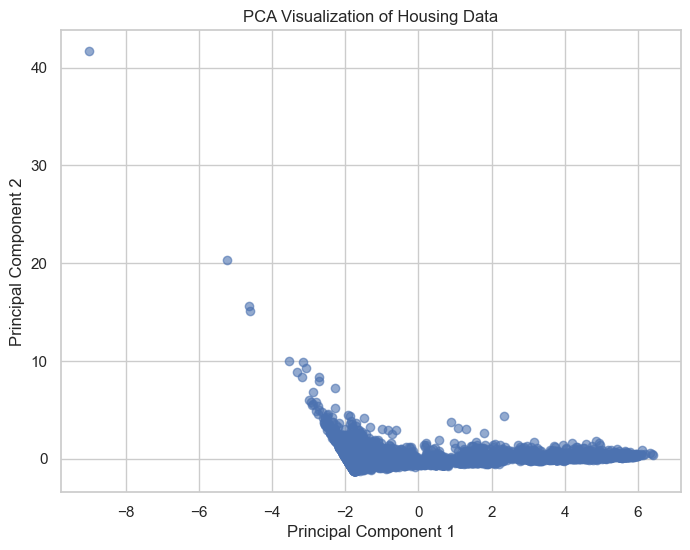

In [9]:
# Преобразование в DataFrame для удобства
df_scaled = pd.DataFrame(data_scaled, columns=df_cleaned.columns)

# Понижение размерности до 2 компонент
pca = PCA(n_components=2)
kc_pca = pca.fit_transform(df_scaled)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(kc_pca[:, 0], kc_pca[:, 1], alpha=0.6)
plt.title("PCA Visualization of Housing Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


**Агломеративная (иерархическая) кластеризация**

Иерархическая кластеризация — метод машинного обучения, предназначенный для группировки объектов (точек данных) на основе их схожести или расстояния друг от друга. Основная идея заключается в создании структуры кластеров в виде дерева (дендрограммы), которое показывает, как объекты группируются на разных уровнях.


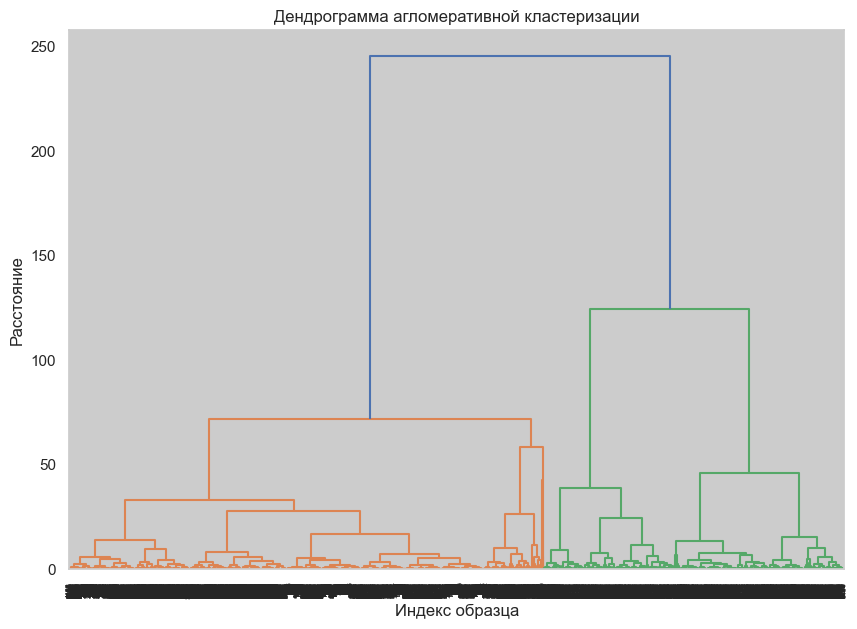

[11  9  6 ... 14 14 15]


In [10]:
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

# Получение результатов кластеризации с заданным порогом
result = fcluster(linkage_matrix, t=10, criterion='distance')
print(result)  # Вывод результатов кластеризации


**Визуализация распределения кластеров**


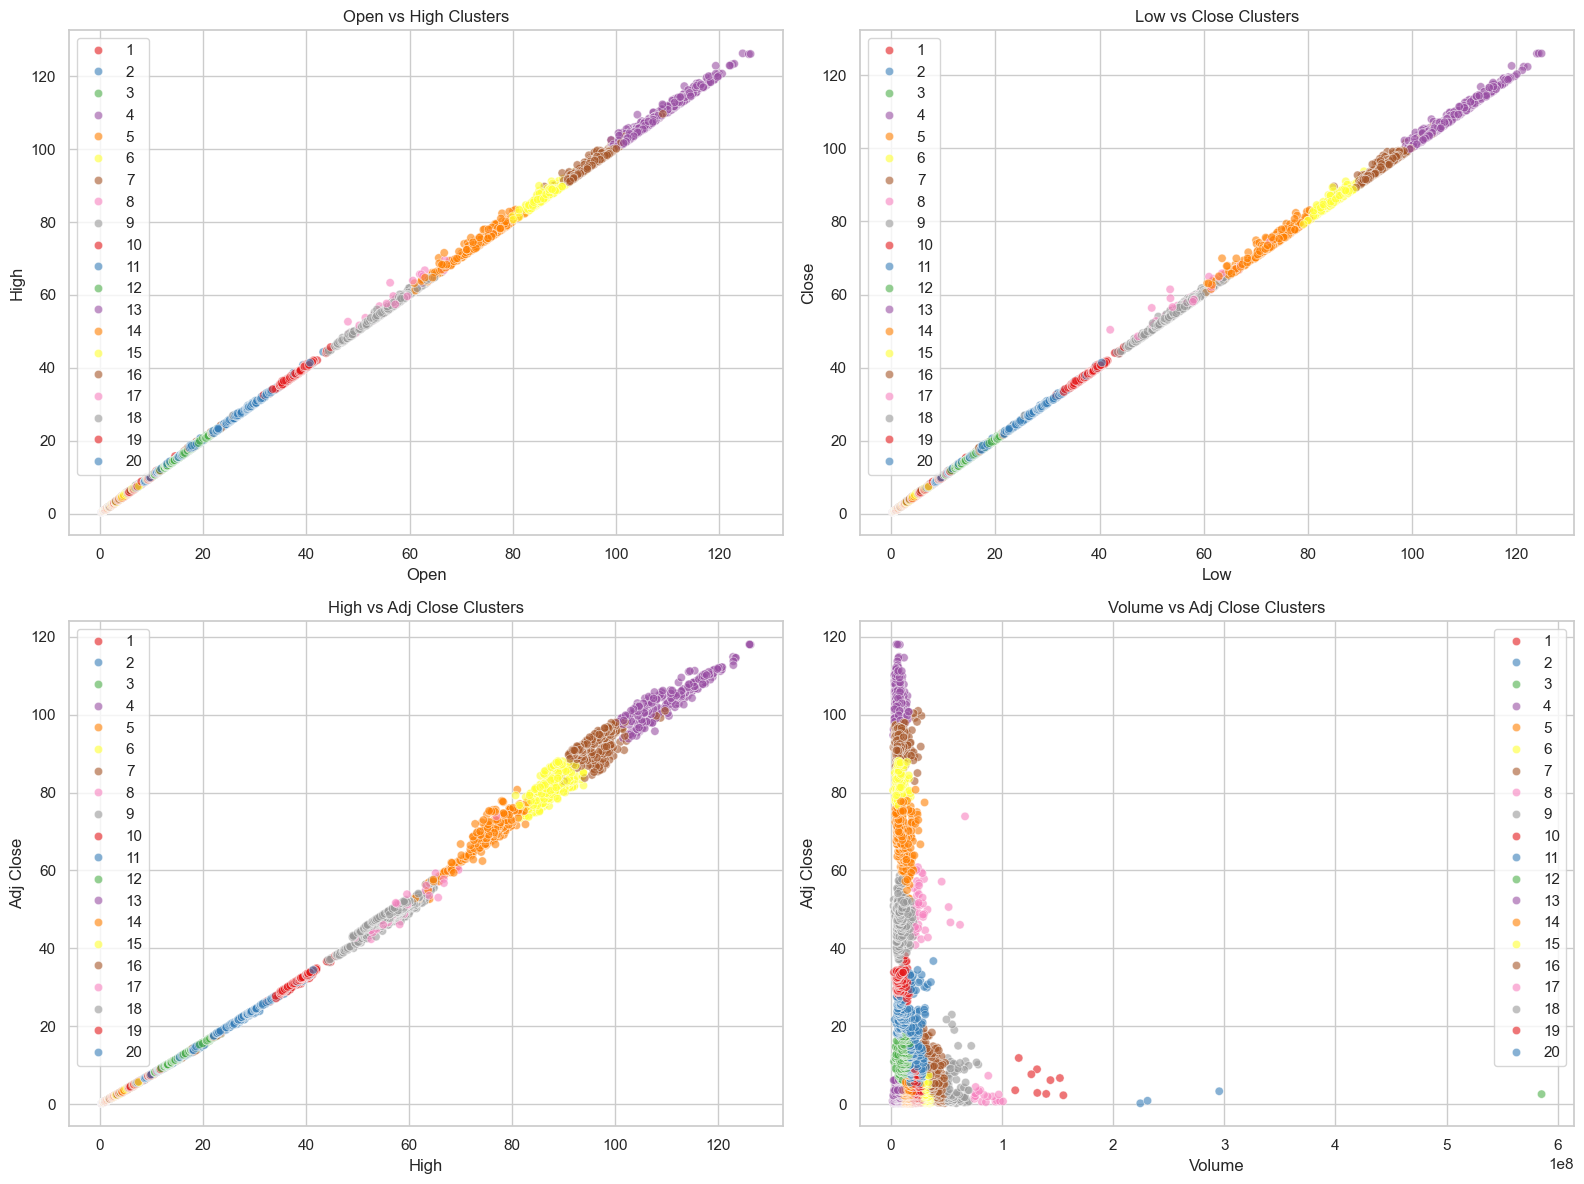

In [11]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], hue=result, palette='Set1', alpha=0.6)
plt.title('Open vs High Clusters')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('Low vs Close Clusters')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('High vs Adj Close Clusters')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('Volume vs Adj Close Clusters')

plt.tight_layout()
plt.show()



Неиерархическая кластеризация — метод группировки данных, при котором объекты распределяются по заданному числу кластеров(в нашем случае - 𝑘 в методе K-Means), основываясь на определенных метриках расстояния или схожести. В отличие от иерархической кластеризации, которая создает древовидную структуру кластеров, неиерархическая работает с фиксированным количеством кластеров и напрямую распределяет объекты в группы.

K-Means:

Один из самых популярных методов.
Делит данные на 𝑘 кластеров, минимизируя сумму квадратов расстояний от каждой точки до её центроида.
Центроиды обновляются итеративно, пока результат не стабилизируется.


**KMeans (неиерархическая кластеризация) для сравнения**


c:\Users\a3012\AIM-PIbd-31-Zhirnova-A-E\aimenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\a3012\AIM-PIbd-31-Zhirnova-A-E\aimenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Центры кластеров:
 [[1.11514668e+01 1.12730106e+01 1.10263573e+01 1.11517428e+01
  8.88448878e+00 1.38211576e+07]
 [7.75090604e+01 7.82228147e+01 7.67780822e+01 7.75181228e+01
  7.11609142e+01 8.57799102e+06]
 [6.49827065e+00 6.66207109e+00 6.35238963e+00 6.51956023e+00
  5.11050859e+00 4.27841811e+07]]


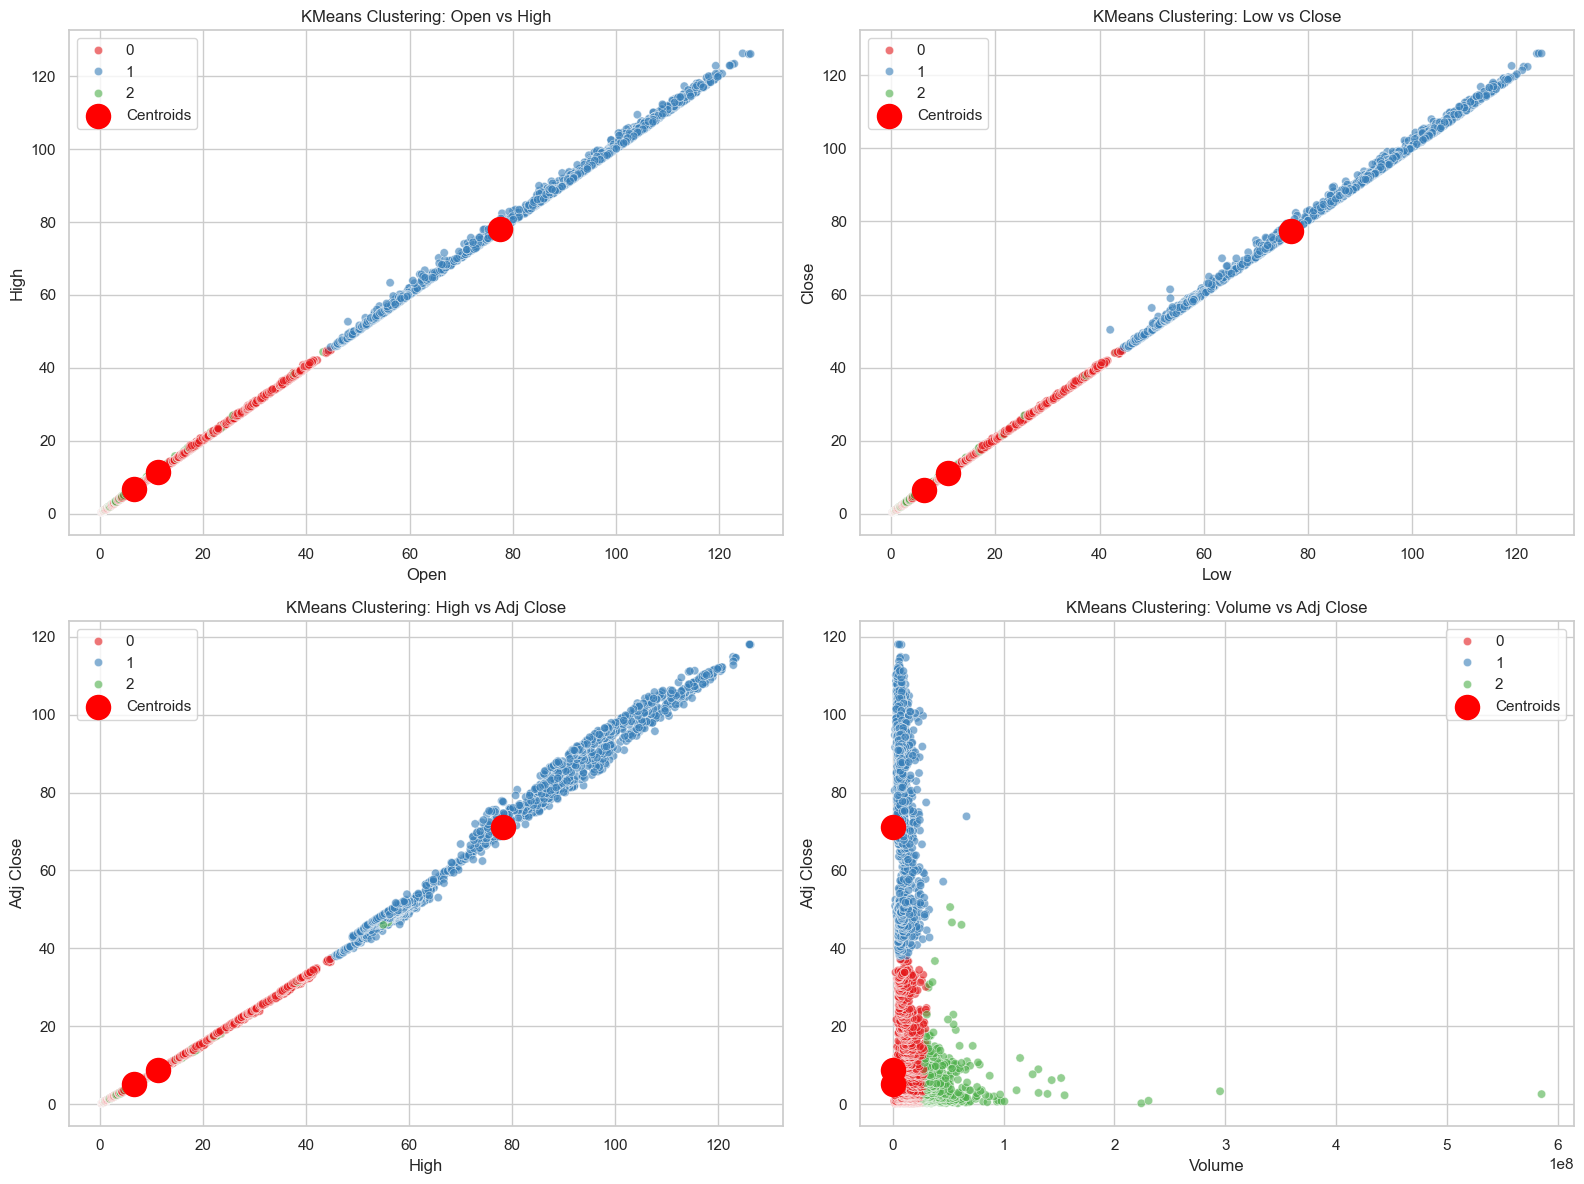

In [12]:
random_state = 9
kmeans = KMeans(n_clusters=3, random_state=random_state)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_

# Отображение центроидов
centers = scaler.inverse_transform(centers)  # Обратная стандартизация
print("Центры кластеров:\n", centers)

# Визуализация результатов кластеризации KMeans
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Open vs High')
plt.legend()

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 2], centers[:, 3], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Low vs Close')
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 1], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: High vs Adj Close')
plt.legend()

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 3], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Volume vs Adj Close')
plt.legend()

plt.tight_layout()
plt.show()

PCA (Principal Component Analysis) — метод сокращения размерности, используемый для преобразования высокоразмерных данных в пространство с меньшим количеством измерений, сохраняя при этом как можно больше информации (дисперсии) из исходных данных.

В контексте графиков для визуализации результатов кластеризации, PCA используется для проекции многомерных данных в двумерное пространство, чтобы можно было легко визуализировать кластеры.


**PCA для визуализации сокращенной размерности**


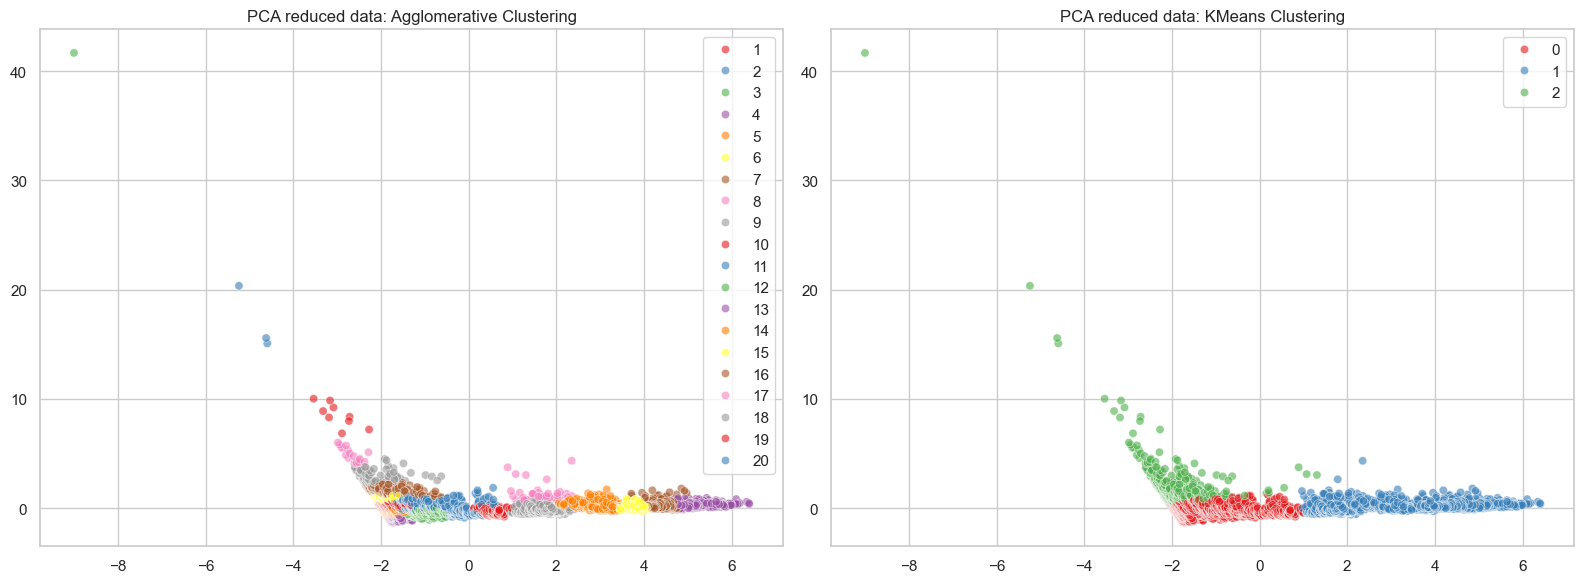

In [13]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=result, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: KMeans Clustering')

plt.tight_layout()
plt.show()


**Анализ инерции для метода локтя (метод оценки суммы квадратов расстояний)**


Анализ инерции для метода локтя — это техника, используемая для определения оптимального числа кластеров в задаче кластеризации (например, для алгоритма K-Means). Метод основывается на оценке суммы квадратичных отклонений (или инерции) объектов от центров их кластеров.

Инерция (в контексте кластеризации) — это метрика, которая измеряет "плотность" кластеров, то есть, насколько близко точки внутри каждого кластера расположены к его центроиду. Формально инерция определяется как сумма квадратов расстояний всех точек до ближайшего центра кластера.

Метод локтя:

Для различных значений 𝑘 (количества кластеров) вычисляется инерция.
Значения инерции отображаются на графике в зависимости от 𝑘.
Смотрится точка, после которой уменьшение инерции значительно замедляется. Эта точка называется локтем, и соответствующее значение 𝑘 считается оптимальным числом кластеров.

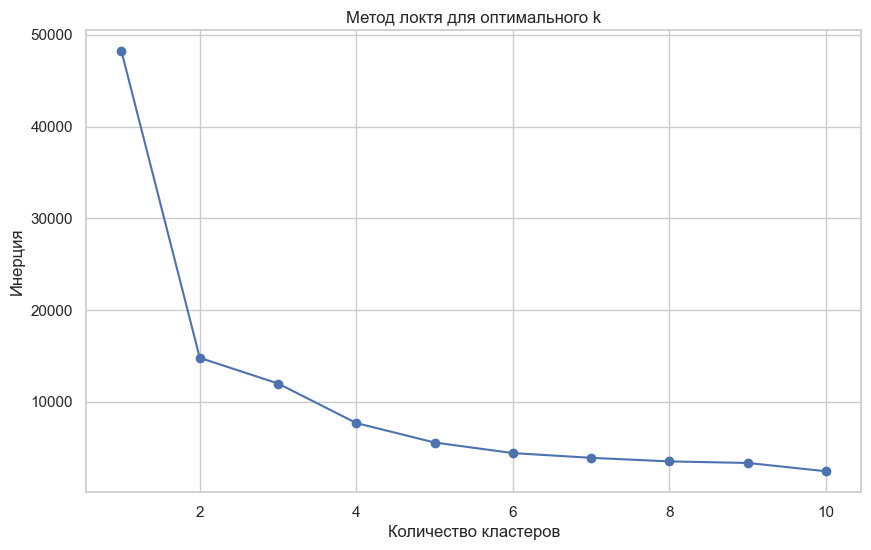

In [14]:
inertias = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

Можно заметить, что после 9-го кластера функция начинает принимать линейный вид, что говорит о следующем: создание более 9-го кластера - не самое оптимальное решение, дальнейшее разбиение данных становится избыточным.


**Расчет коэффициентов силуэта**


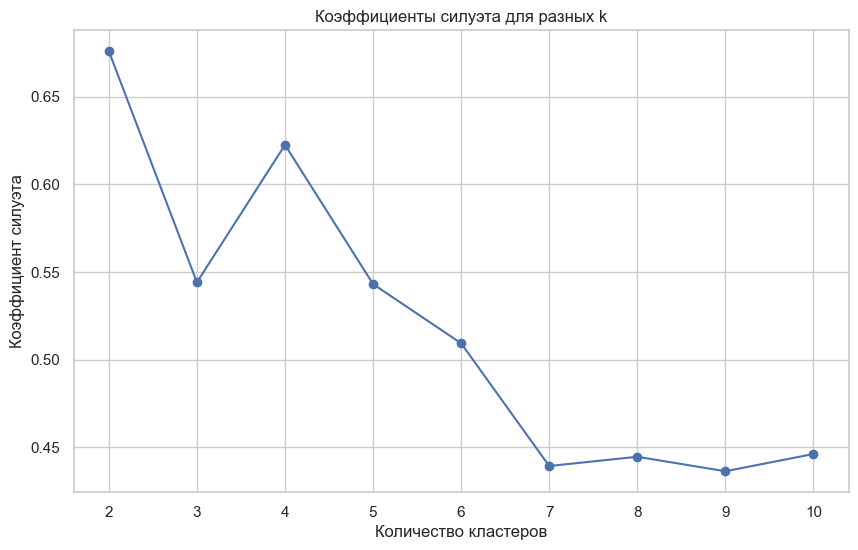

In [15]:
silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

Средний коэффициент силуэта (silhouette score) используется для оценки качества кластеризации. Его значение лежит в диапазоне от -1 до 1. Что означают различные значения:

Близко к 1.0 (0.7–1.0): Кластеры хорошо разделены и компактны. Это отличный результат кластеризации.

От 0.5 до 0.7: Кластеры четко различимы, но есть некоторое пересечение между ними. Это хороший результат.

От 0.25 до 0.5: Кластеры перекрываются, что указывает на менее четкую границу между группами. Качество кластеризации удовлетворительное, но может потребоваться уточнение числа кластеров или доработка данных.

Близко к 0.0: Кластеры сильно перекрываются или распределение данных не позволяет выделить четкие группы. В этом случае нужно пересмотреть выбор числа кластеров, алгоритм или исходные данные.

Меньше 0.0: Плохая кластеризация: точки ближе к центрам чужих кластеров, чем к своим. Это сигнал о том, что данные плохо структурированы для текущей кластеризации.

Средний коэффициент силуэта: 0.547


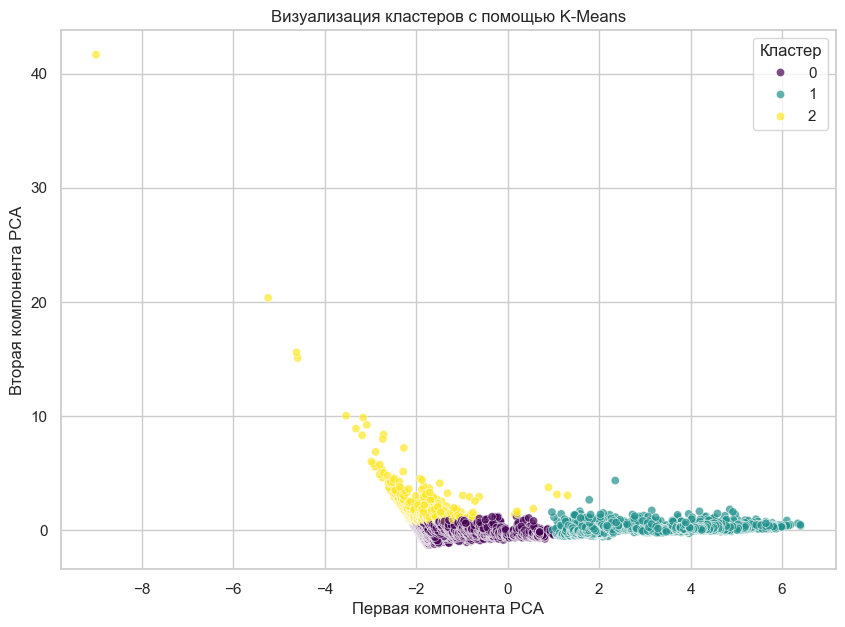

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# ========================
# Применение K-Means
# ========================
kmeans = KMeans(n_clusters=3, random_state=42)  
df_clusters = kmeans.fit_predict(df_scaled)

# ========================
# Оценка качества кластеризации
# ========================
silhouette_avg = silhouette_score(df_scaled, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

# ========================
# Визуализация кластеров
# ========================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()
# что-то такое

Средний коэффициент силуэта, равный 0.547, указывает на умеренно хорошую кластеризацию.
Кластеры четко различимы, но есть некоторое пересечение между ними. Это хороший результат.

Средний коэффициент силуэта (агломеративная кластеризация): 0.578


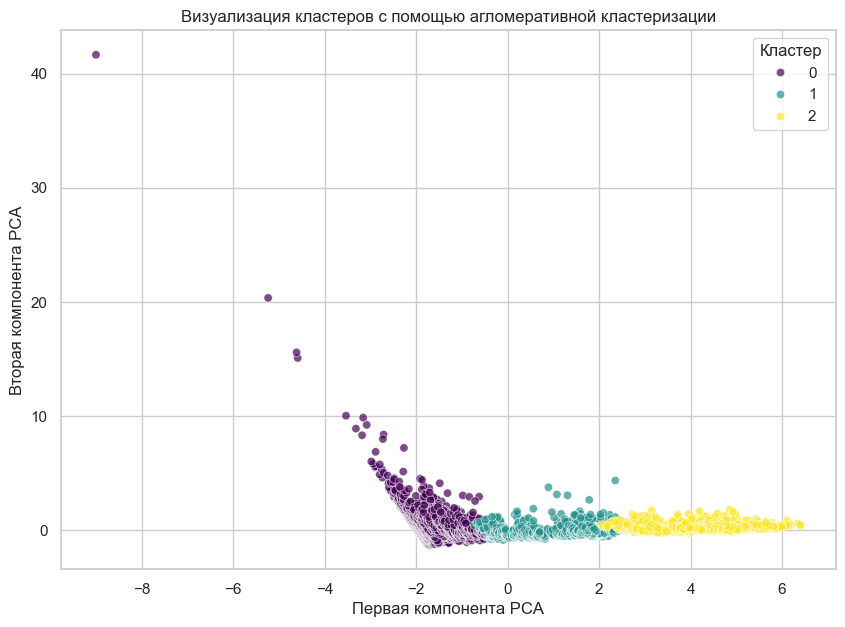

In [17]:
from sklearn.cluster import AgglomerativeClustering

# ========================
# Агломеративная кластеризация
# ========================
agg_cluster = AgglomerativeClustering(n_clusters=3)  
labels_agg = agg_cluster.fit_predict(df_scaled)

# ========================
# Оценка качества кластеризации
# ========================
silhouette_avg_agg = silhouette_score(df_scaled, labels_agg)
print(f'Средний коэффициент силуэта (агломеративная кластеризация): {silhouette_avg_agg:.3f}')

# ========================
# Визуализация кластеров
# ========================
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_agg, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью агломеративной кластеризации')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()

Значение коэффициента силуэта лежит в диапазоне от -1 до 1. Ближе к 1: Хорошо сформированные, плотные кластеры, четко отделенные друг от друга.

Ближе к 0: Кластеры пересекаются или слабо разделены, не имеют четких границ. Точки расположены одинаково близко как к своему кластеру, так и к соседним. Ближе к -1 (Отрицательные значения): Некоторые точки скорее относятся к другим кластерам, чем к текущему (ближе к центрам других кластеров). Очень плохая кластеризация.
Ближе к 1: Все точки внутри каждого кластера плотно сгруппированы и значительно удалены от точек других кластеров. Свидетельствует о четкой и хорошо разделенной структуре данных. Единица говорит об идеальной кластеризации.

Значение 0.578 указывает на то, что кластеры хорошо сформированные, плотные кластеры, четко отделенные друг от друга.